### First You Get the Money, Then You Get the Reviews, Then You Get the Internet Comments: A Quantitative Examination of the Relationship Between Critics, Viewers, and Box Office Success

This notebook reconstructs the Analysis section of the paper <a href="http://dx.doi.org/10.1080/10509208.2016.1156426">Berg & Raddick 2016</a>. The paper examines films released in the U.S. between 2000 and 2015, and studies the relationships between their financial success (measured by U.S. gross box office receipts), perceived quality among viewers (measured by IMDb user scores), and critical ratings (measured by the "Metascores" on metacritic.com).

First, we load the data using the code block below. The code block displays the last 10 movies in the dataset, to prove that we have loaded the data correctly.

## Results

In [105]:
# This code block defined your token and makes it available as a 
#   system variable for the length of your current session.
# 
# This will usually be the first code block in any script you write.

import SciServer.LoginPortal as Login
token=Login.getToken()
user = Login.getKeystoneUserWithToken(token)
print("Your username is: "+user.userName)
print("Your current token is"+token)
# Step 2a: Import Python libraries to work with SciServer

import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive           # read/write to/from SciDrive
print("All SciServer libraries imported")

import numpy as np                  # standard Python lib for math ops
import pandas                       # graphing package
import matplotlib.pyplot as plt     # another graphing package
from matplotlib.ticker import FormatStrFormatter
import urllib                       # parse URLs
import json      # Work with Javascript object notation (.json) files
import datetime
import dateutil
#!pip install tabulate
from tabulate import tabulate
print("All supporting libraries imported")
# Step 2b: Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print("options set")
# First, store the query in an object called "query"
query="""
SELECT thekey, title, studio, openingdate, total_gross, adjusted_gross,
nvotes,userscore,metascore
from movies
"""
queryResponse = CasJobs.executeQuery(query, "mydb",token=token)
movies = pandas.read_csv(queryResponse)
#movies.tail(10)

Your username is: raddick
Your current token is8a5a61c5099c430f93519ab3b6cbeace
All SciServer libraries imported
All supporting libraries imported
options set


In [106]:
#pandas.__version__
#movies = moviepandas.values
#print(movies[0,:])
#movies.dtype = object
#print(movies.dtype.fields)
#movies.dtype = ({'names':['key','title','studio','openingdate','total_gross','adjusted_gross','userscore','metascore'], 'formats':['s13','s256','s16',datetime.datetime.date,'f8','f8','f8','i4']})
#movies.dtype = np.dtype([('thekey','S16'),('title','S256'),('studio','S16'),('date','S50'),('total_gross','f8'),('adjsuted_gross','f8'),('userscore','f4'),('metascore','f4')])
#movies.astype(dtype=[('thekey','S16'),('title','S256'),('studio','S16'),('date','S50'),('total_gross','f8'),('adjsuted_gross','f8'),('userscore','f4'),('metascore','f4')])
#print(movies.dtype)

thedate = [dateutil.parser.parse(d) for d in movies.openingdate]
movies['openingdate_asdate'] = thedate
sdate = [datetime.datetime.strftime(x,'%-m/%-d/%Y') for x in thedate]
movies['openingdate_formatted'] = sdate
total_gross_dollar_string = ['${:,.0f}'.format(d) for d in movies.total_gross]
adjusted_gross_dollar_string = ['${:,.0f}'.format(g) for g in movies.adjusted_gross]
movies['total_gross_formatted'] = total_gross_dollar_string
movies['adjusted_gross_formatted'] = adjusted_gross_dollar_string
#ppp = len(movies[:,'openingdate'])
#print(movies.dtype.fields)
#print(movies.openingdate)
#for k in range(0,len(movies['openingdate'])):
#    tempy[k] = k
#               thedate = [dateutil.parser.parse(movies['openingdate'])]
#print(tempy)
#print(thedate)
#print(tabulate(movies,headers=['key','title','studio','openingdate','total_gross','adjsuted_gross','userscore','metascore'],tablefmt='fancy_grid'))

print('Here is your data:')
movies.head(10)
#movies[['thekey','title','openingdate_formatted','total_gross_formatted','adjusted_gross_formatted','userscore','metascore']].tail(10)

Here is your data:


,thekey,title,studio,openingdate,total_gross,adjusted_gross,nvotes,userscore,metascore,openingdate_asdate,openingdate_formatted,total_gross_formatted,adjusted_gross_formatted
0,fantasi992000,Fantasia 2000 [35mm & IMAX],BV,1/1/2000 12:00:00 AM,60655420,84991250.00,27013,7.3,59,2000-01-01,1/1/2000,"$60,655,420","$84,991,250"
1,nextfri00iday,Next Friday,NL,1/12/2000 12:00:00 AM,57328603,80329660.00,26773,6.1,41,2000-01-12,1/12/2000,"$57,328,603","$80,329,660"
2,mydogsk00skip,My Dog Skip,WB,1/14/2000 12:00:00 AM,34134641,47829950.00,16472,7.0,61,2000-01-14,1/14/2000,"$34,134,641","$47,829,950"
3,superno00ovai,Supernova,MGM,1/14/2000 12:00:00 AM,14230455,19939920.00,14451,4.8,19,2000-01-14,1/14/2000,"$14,230,455","$19,939,920"
4,theevir98rist,The Terrorist,Pha.,1/14/2000 12:00:00 AM,153629,215267.20,1751,7.2,68,2000-01-14,1/14/2000,"$153,629","$215,267"
5,boondoc99ints,The Boondock Saints,Indic.,1/21/2000 12:00:00 AM,30471,42696.41,195958,7.9,44,2000-01-21,1/21/2000,"$30,471","$42,696"
6,downtoy00oyou,Down to You,Mira.,1/21/2000 12:00:00 AM,20069008,28120980.00,12172,4.9,13,2000-01-21,1/21/2000,"$20,069,008","$28,120,980"
7,bigteas99ease,The Big Tease,WB,1/28/2000 12:00:00 AM,187152,262240.10,2125,6.3,53,2000-01-28,1/28/2000,"$187,152","$262,240"
8,eyeofth99lder,Eye of the Beholder,Dest.,1/28/2000 12:00:00 AM,16500786,23121140.00,13239,4.9,29,2000-01-28,1/28/2000,"$16,500,786","$23,121,140"
9,grizzly99alls,Grizzly Falls,Prov.,1/28/2000 12:00:00 AM,168874,236628.70,449,5.9,34,2000-01-28,1/28/2000,"$168,874","$236,629"


Now, we continue with the analysis section of the paper.

## Financial data: Release times and box office receipts

Table 1 shows the number of movies in our dataset by year of release.

### Table 1. Number of films released per year in our dataset.

In [107]:
years = [k.year for k in movies.openingdate_asdate]

movies['year'] = years
#movies['year']=movies['releaseyear']
movies
grouped = movies.groupby('year')
a = grouped['title'].count()

b = a.to_frame()
print('Table 1. Number of films released per year in our dataset')
print(tabulate(b, headers=['Year','Movies'], tablefmt='fancy_grid'))

Table 1. Number of films released per year in our dataset
╒════════╤══════════╕
│   Year │   Movies │
╞════════╪══════════╡
│   2000 │      312 │
├────────┼──────────┤
│   2001 │      312 │
├────────┼──────────┤
│   2002 │      400 │
├────────┼──────────┤
│   2003 │      402 │
├────────┼──────────┤
│   2004 │      467 │
├────────┼──────────┤
│   2005 │      486 │
├────────┼──────────┤
│   2006 │      511 │
├────────┼──────────┤
│   2007 │      487 │
├────────┼──────────┤
│   2008 │      441 │
├────────┼──────────┤
│   2009 │      397 │
├────────┼──────────┤
│   2010 │      429 │
├────────┼──────────┤
│   2011 │      499 │
├────────┼──────────┤
│   2012 │      544 │
├────────┼──────────┤
│   2013 │      583 │
├────────┼──────────┤
│   2014 │      602 │
├────────┼──────────┤
│   2015 │      556 │
╘════════╧══════════╛


Most new films are released into theaters on <font color='red'>Fridays (n = 6,506; 88%)</font>, with the only other day with an appreciable number of releases being <font color='red'>Wednesday (n = 791; 11%)</font>.

In [108]:
openingdates = [k.strftime('%w') for k in movies['openingdate_asdate']]
openingdates = [int(p) for p in openingdates]

movies['dayofweek'] = openingdates
gh = movies.groupby('dayofweek').count()

gh['weekdayname'] = ''
gh.loc[gh.index == 0, 'weekdayname'] = 'Sunday'
gh.loc[gh.index == 1, 'weekdayname'] = 'Monday'
gh.loc[gh.index == 2, 'weekdayname'] = 'Tuesday'
gh.loc[gh.index == 3, 'weekdayname'] = 'Wednesday'
gh.loc[gh.index == 4, 'weekdayname'] = 'Thursday'
gh.loc[gh.index == 5, 'weekdayname'] = 'Friday'
gh.loc[gh.index == 6, 'weekdayname'] = 'Saturday'

#print(gh)
ghprint = gh[['weekdayname','title']]
ghprint.set_index(['weekdayname'],inplace=True)
#print(ghprint)

count_formatted = ['{:,.0f}'.format(p) for p in ghprint['title']]
ghprint['title_formatted'] = count_formatted

#title_formatted = ['{:,.0f}'.format(q) for q in ghprint['title']]
#print(title_formatted)
#ghprint['title'] = title_formatted

ghprint['percentage'] = 100*(ghprint['title'] / movies['title'].count())
percentage_formatted = ['{:,.1f}%'.format(q) for q in ghprint['percentage']]
ghprint['percentage'] = percentage_formatted

ghprint.drop(['title'],axis=1,inplace=True)

print(tabulate(ghprint,headers=['Weekday','Movies','Percent of movies'],tablefmt='fancy_grid'))

╒═══════════╤══════════╤═════════════════════╕
│ Weekday   │ Movies   │ Percent of movies   │
╞═══════════╪══════════╪═════════════════════╡
│ Sunday    │ 8        │ 0.1%                │
├───────────┼──────────┼─────────────────────┤
│ Monday    │ 9        │ 0.1%                │
├───────────┼──────────┼─────────────────────┤
│ Tuesday   │ 25       │ 0.3%                │
├───────────┼──────────┼─────────────────────┤
│ Wednesday │ 791      │ 10.6%               │
├───────────┼──────────┼─────────────────────┤
│ Thursday  │ 78       │ 1.1%                │
├───────────┼──────────┼─────────────────────┤
│ Friday    │ 6,506    │ 87.6%               │
├───────────┼──────────┼─────────────────────┤
│ Saturday  │ 11       │ 0.1%                │
╘═══════════╧══════════╧═════════════════════╛


Table 2 shows the number of movies released by month over our entire study
period. The number of theatrical releases per month is roughly the same throughout
the year, as is required to keep a fresh supply of movies available in theaters
year-round. Slightly fewer movies are released in January, and slightly more are
released in the fall.

### Table 2. Number of films released per month.

In [109]:
months = [k.month for k in movies.openingdate_asdate]
#monthname = [datetime.datetime.strftime(k,'%B') for k in movies.openingdate_asdate]
movies['releasemonth'] = months
#movies['releasemonthname'] = monthname
#movies['releasemonth_str'] = months_str
#movies.tail(10)

grouped = movies.groupby('releasemonth')

a = grouped[['title']].count()
a['releasemonthname'] = a.index
a.loc[a['releasemonthname'] == 1, 'releasemonthname'] = 'January'
a.loc[a['releasemonthname'] == 2, 'releasemonthname'] = 'February'
a.loc[a['releasemonthname'] == 3, 'releasemonthname'] = 'March'
a.loc[a['releasemonthname'] == 4, 'releasemonthname'] = 'April'
a.loc[a['releasemonthname'] == 5, 'releasemonthname'] = 'May'
a.loc[a['releasemonthname'] == 6, 'releasemonthname'] = 'June'
a.loc[a['releasemonthname'] == 7, 'releasemonthname'] = 'July'
a.loc[a['releasemonthname'] == 8, 'releasemonthname'] = 'August'
a.loc[a['releasemonthname'] == 9, 'releasemonthname'] = 'September'
a.loc[a['releasemonthname'] == 10, 'releasemonthname'] = 'October'
a.loc[a['releasemonthname'] == 11, 'releasemonthname'] = 'November'
a.loc[a['releasemonthname'] == 12, 'releasemonthname'] = 'December'

a['percentoftotal'] = (100*a['title'] / (np.count_nonzero(movies['title'])))
percentages = [format(k,'.1f') for k in a['percentoftotal']]
a['percentoftotal'] = percentages

#p = format(234.2523234234,'.1f')
#print(p)
#a['percentoftotal'] = "{5.1f}".format(a['percentoftotal'])
#cols = a.columns.tolist()
#cols = cols[-1:] + cols[:-1]
#a = a[cols]
#a.columns = [['Movies']]

#state_pcts = state_office.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
#a
a.set_index(['releasemonthname'],inplace='true')
#print(a.index)
print('Table 2. Number of films released per month')
print(tabulate(a,headers=['Month','Movies','Percent of all releases'],tablefmt='fancy_grid'))

Table 2. Number of films released per month
╒═══════════╤══════════╤═══════════════════════════╕
│ Month     │   Movies │   Percent of all releases │
╞═══════════╪══════════╪═══════════════════════════╡
│ January   │      419 │                       5.6 │
├───────────┼──────────┼───────────────────────────┤
│ February  │      509 │                       6.9 │
├───────────┼──────────┼───────────────────────────┤
│ March     │      668 │                       9   │
├───────────┼──────────┼───────────────────────────┤
│ April     │      683 │                       9.2 │
├───────────┼──────────┼───────────────────────────┤
│ May       │      621 │                       8.4 │
├───────────┼──────────┼───────────────────────────┤
│ June      │      593 │                       8   │
├───────────┼──────────┼───────────────────────────┤
│ July      │      579 │                       7.8 │
├───────────┼──────────┼───────────────────────────┤
│ August    │      690 │                       9.3 │
├─

The Box Office Mojo dataset is missing some values for gross box office receipts; the number of films with receipts listed is <font color='red'>7,230</font>, which is <font color='red'>97%</font> of all movies in the dataset. A quick review of <font color='red'>the few titles that are missing</font> shows, as expected, they are all small releases whose data would be highly unlikely to change any of our conclusions.

In [110]:
print('Total number of movies:',movies['title'].count())
print('Movies with U.S. box office figures:',movies['title'][movies['total_gross'] > 0].count())
print("\n")

percentage_with_box_office = 100*(movies['title'][movies['total_gross'] > 0].count()/movies['title'].count())

print('Percentage of movies with box office figures: ','{:,.0f}'.format(percentage_with_box_office),'%')
print("\n")

print('Movies with no box office data:')

print(tabulate(movies[['title','year']][movies['total_gross'] == -9999],headers=['ID','Title','Year'],tablefmt='fancy_grid'))

Total number of movies: 7428
Movies with U.S. box office figures: 7230


Percentage of movies with box office figures:  97 %


Movies with no box office data:
╒══════╤══════════════════════════════════════════════════════╤════════╕
│   ID │ Title                                                │   Year │
╞══════╪══════════════════════════════════════════════════════╪════════╡
│ 1120 │ Marion Bridge                                        │   2003 │
├──────┼──────────────────────────────────────────────────────┼────────┤
│ 1130 │ Venus and Mars                                       │   2003 │
├──────┼──────────────────────────────────────────────────────┼────────┤
│ 1175 │ The Three Marias                                     │   2003 │
├──────┼──────────────────────────────────────────────────────┼────────┤
│ 1262 │ Catching Out                                         │   2003 │
├──────┼──────────────────────────────────────────────────────┼────────┤
│ 1359 │ Mail Order Bride             

After correcting for inflation to express all values in December 2014 dollars, the movies in our dataset combined for gross box office receipts of more than <font color='red'>$175 billion</font>, underscoring once again the enormous importance of the American film industry.

In [111]:
print('Total box office receipts for all movies, 2000-2015 (in 2015 dollars): ','${:,.0f}'.format(movies['adjusted_gross'][movies['adjusted_gross'] > 0].sum()))

Total box office receipts for all movies, 2000-2015 (in 2015 dollars):  $175,650,774,101


What companies are producing these films? Table 3 shows the top studios represented
in our dataset, in terms of total adjusted gross for all movies released.

### Table 3. Number of films released per studio in our entire dataset.

In [112]:
bystudio = movies[(movies['total_gross'] > 0) & (movies['studio'] != ' ')].groupby('studio').agg({'thekey': np.size,'adjusted_gross' : np.sum})
#bystudio.tail(10)
bystudio = bystudio.sort_values('adjusted_gross',ascending=False)
#bystudio.head(10)

studio_names = [k for k in bystudio.index]
#print(len(studio_names))

yyy = [movies[movies['studio'] == m]['adjusted_gross'].idxmax() for m in studio_names]
#print(len(yyy))

zzz = [movies['title'].loc[g] for g in yyy]
#print(len(zzz))

bystudio['highest_movie'] = zzz

themoney = [d/1000000000 for d in bystudio.adjusted_gross]
themoney = ['${:,.1f}'.format(g) for g in themoney]
bystudio['adjusted_gross_formatted'] = themoney

bystudio['studio_name'] = ''
bystudio['studio_name'][bystudio.index == 'BV'] = 'Buena Vista'
bystudio['studio_name'][bystudio.index == 'WB'] = 'Warner Brothers'
bystudio['studio_name'][bystudio.index == 'Fox'] = '20th Century Fox'
bystudio['studio_name'][bystudio.index == 'Uni.'] = 'Universal'
bystudio['studio_name'][bystudio.index == 'Sony'] = 'Sony'
bystudio['studio_name'][bystudio.index == 'Par.'] = 'Paramount'
bystudio['studio_name'][bystudio.index == 'NL'] = 'New Line'
bystudio['studio_name'][bystudio.index == 'P/DW'] = 'Paramount / DreamWorks'
bystudio['studio_name'][bystudio.index == 'LGF'] = 'Lionsgate Entertainment'
bystudio['studio_name'][bystudio.index == 'DW'] = 'Dream Works'
bystudio['studio_name'][bystudio.index == 'WB (NL)'] = 'Warner Brothers / New Line'
bystudio['studio_name'][bystudio.index == 'SonR'] = 'Sony Revolution Studios'
bystudio['studio_name'][bystudio.index == 'Mira.'] = 'Miramax'
bystudio['studio_name'][bystudio.index == 'SGem'] = 'Screen Gems'
bystudio['studio_name'][bystudio.index == 'FoxS'] = 'Fox Searchlight'

bystudioprint = bystudio[['studio_name','thekey','highest_movie','adjusted_gross_formatted']].head(15)
#print(zzz.columns)
#print(zzz.count('title'))
print('Table 3. Number of films released per studio in our entire dataset.')
print(tabulate(bystudioprint,headers=['Abbrev.','Studio','Movies','Top-grossing title','Total (2015 B$)'],tablefmt='simple'))

Table 3. Number of films released per studio in our entire dataset.
Abbrev.    Studio                        Movies  Top-grossing title                             Total (2015 B$)
---------  --------------------------  --------  ---------------------------------------------  -----------------
BV         Buena Vista                      237  Star Wars: The Force Awakens                   $24.5
WB         Warner Brothers                  309  The Dark Knight                                $23.4
Fox        20th Century Fox                 253  Avatar                                         $20.6
Uni.       Universal                        252  Jurassic World                                 $20.2
Sony       Sony                             210  Spider-Man                                     $16.3
Par.       Paramount                        178  Iron Man                                       $14.3
NL         New Line                          88  The Lord of the Rings: The Return of the King

These <font color='red'>15</font> studios together are responsible for more than <font color='red'>87%</font> of all gross box office receipts during our study period. The limitations of our dataset preclude making comparisons between studios; for example, Screen Gems is a division of Sony Pictures, but they are listed as separate rows in Table 3. However, Table 3 does lend support to the common observation that only a few studios contribute most of the industry’s financial returns.

In [113]:
print('Table 3 includes ',bystudio['studio_name'][bystudio['studio_name'] != ''].count(),' studios.')

print('These studios\' box office receipts add up to: ','${:,.0f}'.format(bystudio['adjusted_gross'][bystudio['studio_name'] != ''].sum()),'.')

print('All studios\' box office receipts add up to: ','${:,.0f}'.format(bystudio['adjusted_gross'].sum()),'.')

big_studio_percentage = 100*(bystudio['adjusted_gross'][bystudio['studio_name'] != ''].sum()/bystudio['adjusted_gross'].sum())

print('Thus, the studios shown in Table 3 account for ','{:,.0f}%'.format(big_studio_percentage),'of total receipts.')

Table 3 includes  15  studios.
These studios' box office receipts add up to:  $153,314,187,108 .
All studios' box office receipts add up to:  $175,649,981,717 .
Thus, the studios shown in Table 3 account for  87% of total receipts.


This observation shows that, like many economic and social phenomena, film box office receipts are extremely top-heavy, with a few titles responsible for most receipts, and a large number of titles generating much smaller receipts. This fact means that the analysis of movie receipts data is clearer if receipts are sorted into bins of unequal size. Table 4 shows the number of movies in each of four bins (again, figures are in inflation-adjusted December 2015 dollars):

1. Box office receipts less than \$100,000

2. Greater than (or equal to) \$100,000 but less than \$10 million

3. Greater than (or equal to) \$10 million but less than \$100 million

4. \$100 million or more

### Table 4. Number of films in our dataset for which the gross box office receipts reach four different levels (bins).

In [114]:
movies['moneybin'] = 0
movies.loc[movies['total_gross'] < 100000, 'moneybin'] = 1
movies.loc[(movies['total_gross'] > 100000) & (movies['total_gross'] <= 10000000), 'moneybin'] = 2
movies.loc[(movies['total_gross'] > 10000000) & (movies['total_gross'] <= 100000000), 'moneybin'] = 3
movies.loc[movies['total_gross'] > 100000000, 'moneybin'] = 4

table4all = movies.groupby('moneybin').count()

#table4all['percentoftotal'] = (100*table4all['title'] / (np.count_nonzero(table4all['title'])))

#table4all.sort_index()

table4 = table4all[['title']]

table4['moneybin_name'] = ''
table4['moneybin_name'][table4.index == 1] = 'Less than $100,000'
table4['moneybin_name'][table4.index == 2] = '$100,000 - $10 million'
table4['moneybin_name'][table4.index == 3] = '$10 - $100 million'
table4['moneybin_name'][table4.index == 4] = 'More than $100,000,000'

table4['percentoftotal'] = (100*table4all['title'] / (movies['title'].count()))

formatted_percent_table4 = ['{:,.1f}%'.format(q) for q in table4['percentoftotal']]
table4['percentoftotal'] = formatted_percent_table4


print('Table 4. Number of films in our dataset for which the gross box office receipts reach four different levels (bins).')
print(tabulate(table4[['moneybin_name','title','percentoftotal']],headers=['Bin number','Bin','Movies','Percent of all movies'],tablefmt='fancy_grid'))
#print(tabulate(table4,headers=['Bin','Movies'],tablefmt='fancy_grid'))

Table 4. Number of films in our dataset for which the gross box office receipts reach four different levels (bins).
╒══════════════╤════════════════════════╤══════════╤═════════════════════════╕
│   Bin number │ Bin                    │   Movies │ Percent of all movies   │
╞══════════════╪════════════════════════╪══════════╪═════════════════════════╡
│            1 │ Less than $100,000     │     2608 │ 35.1%                   │
├──────────────┼────────────────────────┼──────────┼─────────────────────────┤
│            2 │ $100,000 - $10 million │     2617 │ 35.2%                   │
├──────────────┼────────────────────────┼──────────┼─────────────────────────┤
│            3 │ $10 - $100 million     │     1769 │ 23.8%                   │
├──────────────┼────────────────────────┼──────────┼─────────────────────────┤
│            4 │ More than $100,000,000 │      434 │ 5.8%                    │
╘══════════════╧════════════════════════╧══════════╧═════════════════════════╛


Another way to show such top-heavy data is to plot a histogram of the logarithm (base 10) of both observed values and frequency counts. Figure 1 shows this plot for box office receipts in our dataset. A histogram is a graph showing a range of data values along the bottom (the x-axis). The range is divided into smaller groupings called “bins”; above each bin is a bar whose height shows how many times the values in that bin occur in the dataset.

### Figure 1

Figure 1


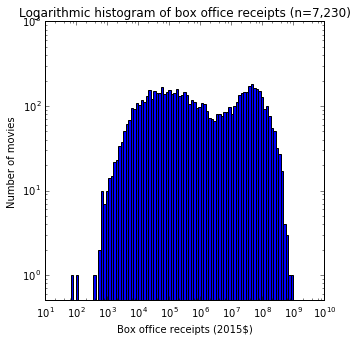

In [115]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(1,1,1)
#ax1.hist(movies['userscore'],bins=90,range=(1,10))
#ax1.hist(movies['total_gross'],bins=np.logspace(1, 9, 50),log=True)
ax1.hist(movies['adjusted_gross'],bins=np.logspace(1, 9, 100),log=True)
ax1.set_xscale("log")
ax1.axis([10,10000000000,0.5,1000])
# Add a title.
#movies[movies['total_gross'] > 0].count()   # 7,230 movies have box office receipts recorded
ax1.set_title("Logarithmic histogram of box office receipts (n=7,230)",fontsize=12)
# Add some axis labels.
ax1.set_xlabel("Box office receipts (2015$)",fontsize=10)
ax1.set_ylabel("Number of movies",fontsize=10)

print('Figure 1')
fig1.show()

#movies['log_total_gross'] = np.log10(movies['total_gross'])
#movies[['title','log_total_gross']]

#plt.hist(movies['total_gross'],bins=np.logspace(1, 9, 50))

#plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

In most histograms, all the bins have equal widths, but this histogram is somewhat different. Each tick mark on both the horizontal and vertical axes shows values a factor of ten larger than the previous tick. Thus, each bin along the x-axis actually contains ten times the range of data values of the previous bin, and each bar that reaches an additional tick mark on the y-axis contains ten times as many films as the lower bar.

The two bars to the far left show the <font color='red'>two</font> films with lowest box office receipts, both with around <font color='red'>$100</font> each:

In [116]:
print('The two lowest-grossing films:')

lowest = movies[(movies['adjusted_gross'] > 0)][['title','adjusted_gross']].sort_values('adjusted_gross').head(2)

moviemoney = ['${:,.0f}'.format(g) for g in lowest.adjusted_gross]
lowest['adjusted_gross_formatted'] = moviemoney
lowestprint = lowest[['title','adjusted_gross_formatted']]
print(tabulate(lowestprint,headers=['id','title','adjsuted_gross'],tablefmt='fancy_grid'))

The two lowest-grossing films:
╒══════╤═══════════════╤══════════════════╕
│   id │ title         │ adjsuted_gross   │
╞══════╪═══════════════╪══════════════════╡
│ 5705 │ Storage 24    │ $74              │
├──────┼───────────────┼──────────────────┤
│ 3841 │ The Objective │ $106             │
╘══════╧═══════════════╧══════════════════╛


The two bars on the far right show the <font color='red'>two</font> highest-grossing movies, both of which brought in more than <font color='red'>$800 million</font> (inflation-adjusted).

In [117]:
print('The two highest-grossing films:')

highest = movies[(movies['adjusted_gross'] > 0)][['title','adjusted_gross']].sort_values('adjusted_gross',ascending=False).head(2)

moviemoney = ['${:,.0f}'.format(g) for g in highest.adjusted_gross]
highest['adjusted_gross_formatted'] = moviemoney
highestprint = highest[['title','adjusted_gross_formatted']]
print(tabulate(highestprint,headers=['id','title','adjsuted_gross'],tablefmt='fancy_grid'))

The two highest-grossing films:
╒══════╤══════════════════════════════╤══════════════════╕
│   id │ title                        │ adjsuted_gross   │
╞══════╪══════════════════════════════╪══════════════════╡
│ 7419 │ Star Wars: The Force Awakens │ $936,519,700     │
├──────┼──────────────────────────────┼──────────────────┤
│ 4204 │ Avatar                       │ $821,205,200     │
╘══════╧══════════════════════════════╧══════════════════╛


Keeping in mind the caveat that logarithmic scales introduce distortions in plots, we note the fascinating bimodal (double-peaked) distribution of receipts, with one peak of around \$200,000 and another of around \$30,000,000. We suspect this is due to the distribution gap between wide release and limited release movies, with the \$200,000 peak representing the average for a film that only screened in a few places and the \$30,000,000 peak representing the average for wide release movies, but more careful research is needed to draw conclusions.

### Critical judgment data: User and critic ratings

Financial returns are the data most important to studio decisions, but are only one part of the story of how our culture understands the film industry. The other important consideration is the perceived artistic merit of the films. We do not make any artistic judgments ourselves; rather, we consider the opinions of two groups: viewers - specifically, registered users of the Internet Movie Database (IMDb) - and professional film critics. Data sources for each are explained in the Data and Methods section.

As described in the Data section, IMDb provides user ratings only for those movies that have received more than five user votes; but many movies have received many more votes, all the way up to The Dark Knight, which has more than 1 million votes. Our dataset of user ratings contains <font color='red'>321,488,529</font> individual votes. As described in the Data and Methods section, we know that within an individual title, each user can vote only once; but of course users may vote on more than one movie, so we have no way of knowing how many people contributed these <font color='red'>321,488,529</font> votes. But it is safe to say that our dataset of user ratings is one of the largest ever used in a study of this type.

In [118]:
print('Total IMDb votes in our dataset: ','{:,.0f}'.format(movies['nvotes'].sum()))

Total IMDb votes in our dataset:  321,488,529


Figure 2 shows the histogram of user scores. User scores from 1 to 10 are shown along the bottom of the graph (on the x-axis). The number of movies with that score is shown along the left side (on the y-axis).

Movies with IMDb user ratings:  7,428


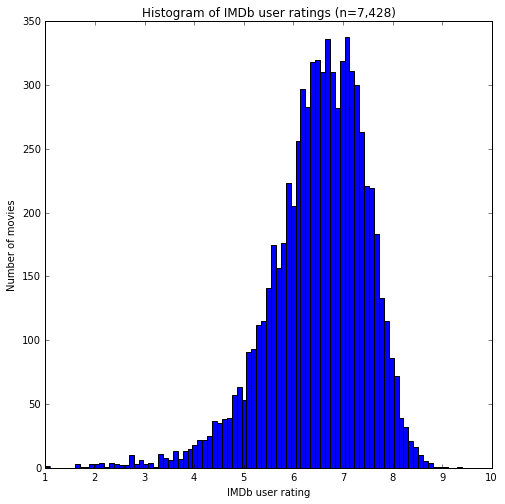

In [119]:
nUserscore = movies['title'][movies['userscore'] > 0].count()
print("Movies with IMDb user ratings: ",'{:,.0f}'.format(nUserscore))

## Bin widths recommended by the Freedman-Diaconis rule: h= 2∗IQR∗(n^(−1/3)); bin number = (max-min)/h
#n = movies['userscore'].count()
#interquantile_range = movies['userscore'].quantile(.75) - movies['userscore'].quantile(.25)
#h = 2*interquantile_range*(n**(-1/3))
#nbins = np.round((movies['userscore'].max() - movies['userscore'].min()) / h,0)
#print(nbins)

fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(1,1,1)
#ax2.hist(movies['userscore'],bins=nbins,range=(1,10))
ax2.hist(movies['userscore'],bins=91,range=(1,10))
ax2.axis([1,10,0,350])
#ax2.tick_params(axis='both', which='major', labelsize=8)
# Add a title.
ax2_title_string = 'Histogram of IMDb user ratings (n='+'{:,.0f}'.format(nUserscore)+")"
ax2.set_title(ax2_title_string,fontsize=12)
# Add some axis labels.
ax2.set_xlabel("IMDb user rating",fontsize=10)
ax2.set_ylabel("Number of movies",fontsize=10)

fig2.show()

The leftmost bar shows <font color='red'>the single movie with the minimum user score of 1.0: <i>Moebius</i></font>. The rightmost bar shows <font color='red'>the single movie with the maximum user score of 9.4: <i>Isn't This a Time! A Tribute to Harold Leventhal</i></font>.

In [120]:
print(tabulate(movies[['title','userscore']].loc[movies['userscore'].idxmax()].to_frame(),headers=['Movie with highest userscore'],tablefmt='fancy_grid'))
print(tabulate(movies[['title','userscore']].loc[movies['userscore'].idxmin()].to_frame(),headers=['Movie with lowest userscore'],tablefmt='fancy_grid'))

╒═══════════╤══════════════════════════════════════════════════╕
│           │ Movie with highest userscore                     │
╞═══════════╪══════════════════════════════════════════════════╡
│ title     │ Isn't This a Time! A Tribute to Harold Leventhal │
├───────────┼──────────────────────────────────────────────────┤
│ userscore │ 9.4                                              │
╘═══════════╧══════════════════════════════════════════════════╛
╒═══════════╤═══════════════════════════════╕
│           │ Movie with lowest userscore   │
╞═══════════╪═══════════════════════════════╡
│ title     │ Moebius                       │
├───────────┼───────────────────────────────┤
│ userscore │ 1.0                           │
╘═══════════╧═══════════════════════════════╛


In spite of the uneven distribution of the number of votes per title (from five to more than one million votes contributing to the ratings), the user ratings show the expected pattern of a bell curve, more precisely described as a "normal distribution."

The mean of the distribution - in other words, the average user rating for a movie on IMDb - is <font color='red'>6.51</font> out of 10. The standard deviation of the distribution of user ratings - a common measure of how much the distribution clusters around the mean value - is <font color='red'>0.99</font>. The definition of standard deviation means that about two-thirds of ratings lie within one standard deviation of the mean; that is, <font color='red'>between 5.53 and 7.50</font>.

In [121]:
print('Minimum number of votes: ','{:,.0f}'.format(movies['nvotes'].min()))
print('Maximum number of votes: ','{:,.0f}'.format(movies['nvotes'].max()))
#print(tabulate(movies[['title','nvotes']].loc[movies['nvotes'].idxmax()].to_frame(),headers=['Movie with most IMDb votes'],tablefmt='fancy_grid'))

meanuserscore = movies['userscore'].mean()
stdevuserscore = movies['userscore'].std()

print('Average user rating:','{:,.2f}'.format(meanuserscore))
print('Standard devition of user rating:','{:,.2f}'.format(stdevuserscore))
print('Two thirds of values lie between','{:,.2f}'.format(meanuserscore - stdevuserscore),'and','{:,.2f}'.format(meanuserscore + stdevuserscore))

Minimum number of votes:  5
Maximum number of votes:  1,638,089
Average user rating: 6.51
Standard devition of user rating: 0.99
Two thirds of values lie between 5.53 and 7.50


What about the ratings given by professional film critics? Figure 3 shows the distribution of “metascores” from the Metacritic website for films in our dataset <font color='red'>(n = 7,428)</font>. The histogram is shown in the same way as in Figure 2, but note that the x-axis (Metascore) now runs from 1 to 100 instead of 1 to 10.

Movies with Metascores:  7,428


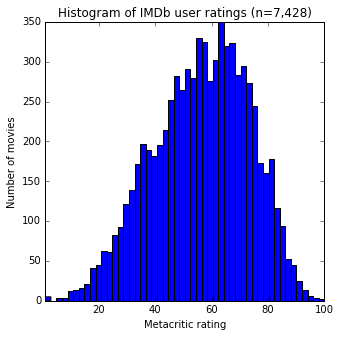

In [122]:
nMetascore = movies['title'][movies['metascore'] > 0].count()
print("Movies with Metascores: ",'{:,.0f}'.format(nMetascore))

## Bin widths recommended by the Freedman-Diaconis rule: h= 2∗IQR∗(n^(−1/3)); bin number = (max-min)/h
#n = movies['metascore'].count()
#interquantile_range = movies['metascore'].quantile(.75) - movies['metascore'].quantile(.25)
#h = 2*interquantile_range*(n**(-1/3))
#nbins = np.round((movies['metascore'].max() - movies['metascore'].min()) / h,0)
#print(nbins)
      
fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.add_subplot(1,1,1)
ax3.hist(movies['metascore'],bins=50,range=(1,100))
#ax3.hist(movies['metascore'],bins=nbins,range=(1,100))
ax3.axis([1,100,0,350])
#ax2.tick_params(axis='both', which='major', labelsize=8)
# Add a title.
ax3_title_string = "Histogram of IMDb user ratings (n="+'{:,.0f}'.format(nMetascore)+")"
ax3.set_title(ax3_title_string,fontsize=12)
# Add some axis labels.
ax3.set_xlabel("Metacritic rating",fontsize=10)
ax3.set_ylabel("Number of movies",fontsize=10)

fig3.show()

<font color='red'>Five</font> films have Metascores of 1 and <font color='red'>two</font> have Metascores of 100.

In [123]:
lowmetascore = movies[['title','year','metascore']][movies['metascore'] == 1]
print('The',lowmetascore['title'].count(),'movies with a Metascore of 1:')
print(tabulate(lowmetascore,headers=['ID','Title','Year','Metascore'],tablefmt='fancy_grid'))

highmetascore = movies[['title','year','metascore']][movies['metascore'] == 100]
print('The',highmetascore['title'].count(),'movies with a Metascore of 100:')
print(tabulate(highmetascore,headers=['ID','Title','Year','Metascore'],tablefmt='fancy_grid'))

The 5 movies with a Metascore of 1:
╒══════╤══════════════════════════════╤════════╤═════════════╕
│   ID │ Title                        │   Year │   Metascore │
╞══════╪══════════════════════════════╪════════╪═════════════╡
│ 2167 │ Chaos                        │   2005 │           1 │
├──────┼──────────────────────────────┼────────┼─────────────┤
│ 5792 │ InAPPropriate Comedy         │   2013 │           1 │
├──────┼──────────────────────────────┼────────┼─────────────┤
│ 6413 │ 10 Rules for Sleeping Around │   2014 │           1 │
├──────┼──────────────────────────────┼────────┼─────────────┤
│ 6712 │ Not Cool                     │   2014 │           1 │
├──────┼──────────────────────────────┼────────┼─────────────┤
│ 7106 │ United Passions              │   2015 │           1 │
╘══════╧══════════════════════════════╧════════╧═════════════╛
The 2 movies with a Metascore of 100:
╒══════╤══════════════════╤════════╤═════════════╕
│   ID │ Title            │   Year │   Metascore │
╞════

The mean Metascore is <font color='red'>56</font>, and the distribution has a standard deviation of <font color='red'>17</font>, meaning that about two-thirds of films have Metascores <font color='red'>between 39 and 73</font>.

In [124]:
meanMetascore = movies['metascore'].mean()
stdevMetascore = movies['metascore'].std()
print('Average Metascore:','{:,.0f}'.format(meanMetascore))

print('Standard devition of Metascore:','{:,.0f}'.format(stdevMetascore))
print('Two thirds of values lie between','{:,.0f}'.format(meanMetascore - stdevMetascore),'and','{:,.0f}'.format(meanMetascore + stdevMetascore))

Average Metascore: 56
Standard devition of Metascore: 17
Two thirds of values lie between 39 and 73


Comparing the distributions of ratings given by viewers and critics (Figures 3 and 4) reveals some fascinating trends. The mean film rating given by critics (<font color='red'>56</font>/100) is lower than the mean rating given by viewers (<font color='red'>6.51</font>/10). Furthermore, the spread of ratings assigned by critics (standard deviation of <font color='red'>17</font>/100) is wider than the spread of ratings assigned by viewers (<font color='red'>0.99</font>/10). These observations mean that, on average, critics assign lower scores than viewers, and that they are more likely to give scores that are higher or lower than their average for all movies.

There could be a number of possible explanations for these observations. Perhaps critics have higher artistic standards for film, and are better able to distinguish small differences in quality. Perhaps critics have learned, consciously or unconsciously, that controversy sells copy, and are therefore more likely to assign scores closer to the extremes. Perhaps the process of becoming a professional film critic selects for people with more extreme opinions. Perhaps the effect is due to some inherent difference in the way in which IMDb and/or Metacritic calculates summary scores, since the specific methods the sites use are not publicly available. Quantitative methods are not ideal for answering such questions of underlying causation, and certainly our study cannot distinguish between these possibilities. We encourage other researchers to continue studying possible reasons for the observed differences in the means and standard deviations of viewers and critics.

### How do critical and public opinions of movies correlate?

Having assembled our dataset and understood its basic statistical properties, we now consider our research questions and hypotheses. Our first research question compares critical and viewer opinions to one another; our second compares both types of opinions to box office receipts. The ideal methods for answering such questions - those that ask how data values change in relation to one another - are the methods of correlation and regression.

A first step in any such study is to graph the variables of interest against one another to look for trends. Figure 4 shows such a graph - a scatterplot with IMDb user scores along the bottom (x-axis) and Metascores along the left side (y-axis). Each point on the graph represents a single movie, showing both types of scores. For orientation, points in the top right corner represent movies that scored highly with both web users and critics; films in the middle left scored moderately well with critics and poorly with users. The graph shows, at a glance, the relationship between user and critic scores for our entire big dataset at once.

# 4. Figure 4: Scatterplot

Scatterplot of IMDb user scores (x-axis) and metacritic critic scores (y-axis).

Figure 4. Scatterplot of ratings by users and critics (n= 7,428 )


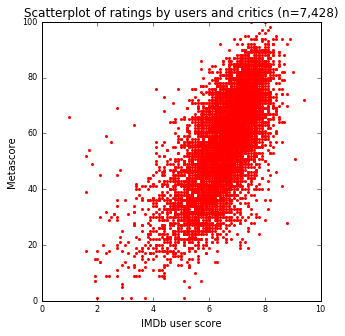

In [125]:
nPoints = movies['title'][(movies['userscore'] > 0) & (movies['metascore'] > 0)].count()
print('Figure 4. Scatterplot of ratings by users and critics (n=','{:,.0f}'.format(nPoints),')')

# This code block uses the matplotlib external library, which you imported earlier.
fig4 = plt.figure(figsize=(5,5))
# Create an Axes object.
ax4 = fig4.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax4.scatter(movies['userscore'],movies['metascore'], s=4,color="red", marker="o")
ax4.axis([0,10,0,100])
ax4.tick_params(axis='both', which='major', labelsize=8)
# Add a title.
title_string = 'Scatterplot of ratings by users and critics (n='+'{:,.0f}'.format(nPoints)+')'
ax4.set_title(title_string,fontsize=12)
# Add some axis labels.
ax4.set_xlabel("IMDb user score",fontsize=10)
ax4.set_ylabel("Metascore",fontsize=10)
fig4.show()   # show the plot

The clearest trend in Figure 4 is the broad cloud of points in the middle, trending roughly diagonally from lower left to upper right. That cloud shows that, while the relationship is by no means perfect, ratings by users and critics do tend to go together.

We hypothesized that user and critic scores would not agree, based on the financial success of such critically reviled movies as Michael Bay’s <i>Transformers</i> series. However, Figure 4 shows that this is clearly not the case.

Can we say anything more quantitative about the relationship between user and critic scores? Yes, using the methods of correlation analysis, which are essentially a formalized way of measuring the strength of the linear trend shown graphically in Figure 4. The correlation is a number ranging from -1 to 1 giving the relationship between two variables. A correlation of 1 indicates that the two variables go together perfectly - when one increases in value, the other always increases at a predictable rate. A correlation of -1 means that the two variables go together in a perfectly opposite way - when one increases, the other decreases at a predictable rate. A correlation of 0 means that the values are completely unrelated. There are no hard-and-fast rules for interpreting correlation values, but a common guideline is that a correlation greater than 0.5 (or less than -0.5) is considered a large correlation.

The correlation between Metacritic critic scores and IMDb user scores in our dataset <font color='red'>(n = 7,428</font> movies) is <font color='red'>.683</font>.

In [126]:
print('Movies with both IMDb user scores and Metascores:','{:,.0f}'.format(movies['title'][(movies['userscore'] >= 0) & (movies['metascore'] >= 0)].count()))

#movies['userscore'] >= 0 and movies['metascore'] >= 0]
print('Correlation between IMDb user scores and Metascores:','{:.3f}'.format(movies['userscore'].corr(movies['metascore'])))

Movies with both IMDb user scores and Metascores: 7,428
Correlation between IMDb user scores and Metascores: 0.683


That value is by no means a perfect correlation, but it is large enough that we can make a clear case that critics and the public tend to give the same movies similar scores.

This fact is all the more intriguing given that the results of our next research question showed variables that do not correlate: neither the user score nor the critic score correlates to any appreciable degree with gross box office receipts, whether considered as raw amounts or adjusted for inflation. Table 5 shows the correlation matrix (the correlation between every variable and every other variable) for user score, critic score, and both types of box office receipts.

In [127]:
#movies.tail(10)
moviestocorr = movies[['userscore','metascore','total_gross','adjusted_gross']]

moviestocorr.rename(index=str, columns={"userscore": "IMDb user score", "metascore": "Metascore", "total_gross": "Box office (raw)", "adjusted_gross": "Box office (inflation-adjusted)"},inplace=True)
allthecorr = moviestocorr.corr()
table5 = allthecorr[(allthecorr.index == "IMDb user score") | (allthecorr.index == "Metascore")]
table5['IMDb user score'] = ['{:.3f}'.format(k) for k in table5['IMDb user score']]
table5['Metascore'] = ['{:.3f}'.format(k) for k in table5['Metascore']]
table5['Box office (raw)'] = ['{:.3f}'.format(k) for k in table5['Box office (raw)']]
table5['Box office (inflation-adjusted)'] = ['{:.3f}'.format(k) for k in table5['Box office (inflation-adjusted)']]

print('Table 5. Correlations among user score, Metascore, and gross box office receipts for films in our dataset.')
#table5['IMDb user score'] = x
print(tabulate(table5,headers=['Variable','IMDb user score','Metascore','Box office (raw)','Box office (adjusted)'],tablefmt='simple'))
#print(table5['IMDb user score'])
#print(tabulate(table5,headers=['Variable','IMDb user score','Metascore','Raw gross','Adjsuted gross'],tablefmt='fancy_grid'))

Table 5. Correlations among user score, Metascore, and gross box office receipts for films in our dataset.
Variable           IMDb user score    Metascore    Box office (raw)    Box office (adjusted)
---------------  -----------------  -----------  ------------------  -----------------------
IMDb user score              1            0.683               0.058                    0.054
Metascore                    0.683        1                   0.014                    0.011


<a name="#back75"></a>Thus, while the statistical evidence in our dataset proved our first hypothesis incorrect, our second hypothesis was supported<a href="#e75"><sup>75</sup></a>. Despite the fact that viewers tend to agree with critics, poor critical reception is not associated with poor box office performance. Since viewers agree with critics a far greater amount of the time than they fail to see a movie at all because of what the critics say (because to rate a film, viewers must have seen it first), we can infer that there is virtually no relationship between what the critics think of a movie and whether or not it makes money at the box office, although we cannot draw conclusions about why.

<a name="#back76"></a>Cartier and Liarte say that, just by being out, a highly rated movie gets people to go to the movies more.<a href="#e76"><sup>76</sup></a> However, rather than contradict our findings, this underscores the idea that there is no connection between critical appraisal and the decision to watch a particular movie. Despite Cartier and Liarte’s observation that the viewing public shows some interest in seeing critically acclaimed movies, the fact that that interest boosts attendance for <i>all</i> films still demonstrates the lack of importance given to the critical appraisal of any one movie.

### The significance of release times to box office take, on average - AKA "dump months"

We next look at how the timing of a film's release is associated with both its box office performance and its artistic merit as measured by users' and critics' ratings. Table 6 shows the data we use in our analysis throughout this section, giving the number of movies included and the means of each variable.

In [128]:
months = [k.month for k in movies.openingdate_asdate]
#monthname = [datetime.datetime.strftime(k,'%B') for k in movies.openingdate_asdate]
movies['releasemonth'] = months
#movies.loc[movies['releasemonth'] == 1, 'releasemonthname'] = 'January'

table6 = movies[(movies['total_gross'] > 0)].groupby('releasemonth').agg({'thekey': np.size,'adjusted_gross' : np.mean,'userscore' : np.mean, 'metascore' : np.mean})

table6['releasemonthname'] = table6.index
table6.loc[table6['releasemonthname'] == 1, 'releasemonthname'] = 'January'
table6.loc[table6['releasemonthname'] == 2, 'releasemonthname'] = 'February'
table6.loc[table6['releasemonthname'] == 3, 'releasemonthname'] = 'March'
table6.loc[table6['releasemonthname'] == 4, 'releasemonthname'] = 'April'
table6.loc[table6['releasemonthname'] == 5, 'releasemonthname'] = 'May'
table6.loc[table6['releasemonthname'] == 6, 'releasemonthname'] = 'June'
table6.loc[table6['releasemonthname'] == 7, 'releasemonthname'] = 'July'
table6.loc[table6['releasemonthname'] == 8, 'releasemonthname'] = 'August'
table6.loc[table6['releasemonthname'] == 9, 'releasemonthname'] = 'September'
table6.loc[table6['releasemonthname'] == 10, 'releasemonthname'] = 'October'
table6.loc[table6['releasemonthname'] == 11, 'releasemonthname'] = 'November'
table6.loc[table6['releasemonthname'] == 12, 'releasemonthname'] = 'December'

nTotal = np.sum(table6['thekey'])
grossTotal = np.mean(table6['adjusted_gross'])
userscoreGlobalMean = np.mean(table6['userscore'])
metascoreGlobalMean = np.mean(table6['metascore'])



t6cols = table6.columns.tolist()
t6cols = ['releasemonthname','thekey','adjusted_gross','userscore','metascore']
table6 = table6[t6cols]


newrownumber = len(table6.index)+1
table6.loc[newrownumber] = ['TOTAL',nTotal,grossTotal,userscoreGlobalMean,metascoreGlobalMean]

table6.set_index('releasemonthname',inplace=True)

table6['thekey'] = ['{:,.0f}'.format(k) for k in table6['thekey']]

table6['adjusted_gross'] = [k/1000000 for k in table6['adjusted_gross']]
table6['adjusted_gross'] = ['${:,.1f}'.format(k) for k in table6['adjusted_gross']]

table6['userscore'] = ['{:.2f}'.format(k) for k in table6['userscore']]
table6['metascore'] = ['{:.1f}'.format(k) for k in table6['metascore']]

print(tabulate(table6,headers=['Month of release','Titles','Avg BO (2015 M$)','Avg IMDb score','Avg Metascore'],tablefmt='fancy_grid'))

╒════════════════════╤══════════╤════════════════════╤══════════════════╤═════════════════╕
│ Month of release   │ Titles   │ Avg BO (2015 M$)   │   Avg IMDb score │   Avg Metascore │
╞════════════════════╪══════════╪════════════════════╪══════════════════╪═════════════════╡
│ January            │ 403      │ $16.1              │             6.37 │            52.5 │
├────────────────────┼──────────┼────────────────────┼──────────────────┼─────────────────┤
│ February           │ 497      │ $21.3              │             6.42 │            53.9 │
├────────────────────┼──────────┼────────────────────┼──────────────────┼─────────────────┤
│ March              │ 656      │ $20.6              │             6.54 │            55.8 │
├────────────────────┼──────────┼────────────────────┼──────────────────┼─────────────────┤
│ April              │ 667      │ $15.4              │             6.45 │            55.5 │
├────────────────────┼──────────┼────────────────────┼──────────────────┼───────

Figure 5, which plots the mean box office receipts for films released in each month, clearly shows the different levels of audience demand in different months.

Figure 5. Mean box office by month of release (n= 7,230 )


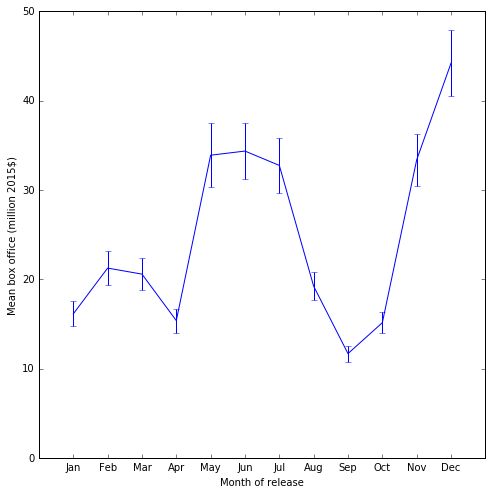

In [131]:
nPoints = movies['title'][(movies['total_gross'] > 0)].count()
print('Figure 5. Mean box office by month of release (n=','{:,.0f}'.format(nPoints),')')

monthnames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig5data = movies[(movies['total_gross'] > 0)].groupby('releasemonth').agg({'adjusted_gross' : np.mean})#.as_matrix()

fig5data['groupn'] = movies[(movies['total_gross'] > 0)].groupby('releasemonth').agg({'adjusted_gross' : 'count'})
fig5data['stdev'] = movies[(movies['total_gross'] > 0)].groupby('releasemonth').agg({'adjusted_gross' : np.std})
fig5data['stderrm'] = 1.96*fig5data['stdev']
fig5data['errorvalues'] = fig5data['stdev'] / (fig5data['groupn']**0.5)

# convert to millions for display
fig5data['adjusted_gross'] = fig5data['adjusted_gross'] / 1000000
fig5data['errorvalues'] = fig5data['errorvalues'] / 1000000
#print(fig5data)
yerrval_matrix = np.zeros((12,1))
yerrval_matrix = fig5data['errorvalues'].as_matrix()
#print(yerrval_matrix)

fig5 = plt.figure(figsize=(8,8))
# Create an Axes object.
ax5 = fig5.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax5.errorbar(fig5data.index,fig5data['adjusted_gross'],yerr=yerrval_matrix)

ax5.axis([0,13,0,50])
#ax5.set_title("Logarithmic histogram of box office receipts (n=7,230)",fontsize=12)
# Add some axis labels.
ax5.set_xlabel("Month of release",fontsize=10)
ax5.set_xticks(np.arange(1, 13, 1))
ax5.set_xticklabels(monthnames)
ax5.set_ylabel("Mean box office (million 2015$)",fontsize=10)

fig5.show()

Error bars show 95% confidence intervals for the mean gross box office receipts for all films in our dataset that were released during a given month. Note that not only are mean receipts lower in somemonths than others, but the difference is so big that the error bars do not overlap. The clear difference in receipts shown in Figure 5 certainly provides strong evidence for the idea that different months have very different levels of audience demand.

Does the difference in box office receipts translate into to a difference in perceived artistic quality? There is indeed a relationship between release month and ratings, but not in a straightforward way. The pattern of monthly variation of scores is very similar in the user and critic scores, but both are different from pattern of box office receipts. Neither of these observations is surprising given our observation, described in the previous section, of a fairly high correlation between user and critic scores, and of the lack of correlation between either type score and gross box office receipts.

In [132]:
nPoints = movies['title'][(movies['userscore'] > 0) & (movies['metascore'] > 0)].count()
#print('Figure 5. Mean box office by month of release (n=','{:,.0f}'.format(nPoints),')')

monthnames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig6adata = movies[(movies['userscore'] > 0)].groupby('releasemonth').agg({'userscore' : np.mean})#.as_matrix()

fig6adata['groupn'] = movies[(movies['userscore'] > 0)].groupby('releasemonth').agg({'userscore' : 'count'})
fig6adata['stdev'] = movies[(movies['userscore'] > 0)].groupby('releasemonth').agg({'userscore' : np.std})
fig6adata['stderrm'] = 1.96*fig6adata['stdev']
fig6adata['errorvalues'] = fig6adata['stdev'] / (fig6adata['groupn']**0.5)

#print(fig5data)
yerrval_matrix = np.zeros((12,1))
yerrval_matrix = fig6adata['errorvalues'].as_matrix()
#print(yerrval_matrix)

fig6 = plt.figure(figsize=(8,8))
# Create an Axes object.
ax6a = fig5.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax6a.errorbar(fig5data.index,fig5data['adjusted_gross'],yerr=yerrval_matrix)

#ax6.axis([0,13,0,50])
#ax5.set_title("Logarithmic histogram of box office receipts (n=7,230)",fontsize=12)
# Add some axis labels.
ax6a.set_xlabel("Month of release",fontsize=10)
#ax6a.set_xticks(np.arange(1, 13, 1))
ax6a.set_xticklabels(monthnames)
ax6a.set_ylabel("Mean user score",fontsize=10)

fig6.show()

In [135]:
nPoints = movies['title'][(movies['userscore'] > 0) & (movies['metascore'] > 0)].count()
#print('Figure 5. Mean box office by month of release (n=','{:,.0f}'.format(nPoints),')')

monthnames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig6adata = movies[(movies['userscore'] > 0)].groupby('releasemonth').agg({'userscore' : np.mean})

fig6adata['groupn'] = movies[(movies['total_gross'] > 0)].groupby('releasemonth').agg({'userscore' : 'count'})
fig6adata['stdev'] = movies[(movies['total_gross'] > 0)].groupby('releasemonth').agg({'userscore' : np.std})
fig6adata['stderrm'] = 1.96*fig6adata['stdev']
fig6adata['errorvalues'] = fig6adata['stdev'] / (fig6adata['groupn']**0.5)

#print(fig6adata.tail(10))
yerrval_matrix = np.zeros((12,1))
yerrval_matrix = fig5data['errorvalues'].as_matrix()
#print(yerrval_matrix)

fig6 = plt.figure(figsize=(8,8))
# Create an Axes object.
ax6a = fig5.add_subplot(1,2,1) # one row, one column, first plot
# Plot the data.
ax6a.errorbar(fig6adata.index,fig6adata['userscore'],yerr=yerrval_matrix)

ax6a.axis([0,13,0,10])
#ax5.set_title("Logarithmic histogram of box office receipts (n=7,230)",fontsize=12)
# Add some axis labels.
ax6a.set_xlabel("Month of release",fontsize=10)
ax6a.set_xticks(np.arange(1, 13, 1))
ax6a.set_xticklabels(monthnames)
ax6a.set_ylabel("Mean box office (million 2015$)",fontsize=10)

ax6b = fig5.add_subplot(1,2,2) # one row, one column, first plot
# Plot the data.
ax6b.errorbar(fig5data.index,fig5data['userscore'],yerr=yerrval_matrix)

ax6b.axis([0,13,0,100])
#ax5.set_title("Logarithmic histogram of box office receipts (n=7,230)",fontsize=12)
# Add some axis labels.
ax6b.set_xlabel("Month of release",fontsize=10)
ax6b.set_xticks(np.arange(1, 13, 1))
ax6b.set_xticklabels(monthnames)
ax6b.set_ylabel("Mean box office (million 2015$)",fontsize=10)

fig6.show()

KeyError: 'userscore'

Finding these differences among movies by month of release are important, but our research questions are somewhat more specific. We investigate the phenomenon of "dump months." As noted in the introduction, studios face the challenge of releasing their stable of films such that some movies are available to play at U.S. theaters throughout the year, even though they know that underlying audience demand varies widely over the course of the year.<a name='back77'></a><sup><a href='#e77'>77</a></sup> Conventional wisdom in cultural studies says that they solve this problem by "dumping" certain movies - releasing those expected to do poorly at the box office—during months that are less profitable for the introduction of new titles. 

The so-called "dump months" have been identified as different months by different authors. January is the most notorious of all of them, as evidenced by the amount of articles in the literature that stress January as the dump month.<a name='back78'></a><sup><a href='#e78'>78</a></sup> The Slate article that inspired this research identified February as a key dump month,<a name='back79'></a><sup><a href='#e79'>79</a></sup> and other authors have identified April<a name='back80'></a><sup><a href='#e80'>80</a></sup> and September.<a name='back81'></a><sup><a href='#e81'>81</a></sup> Authors have disagreed about whether March, August, and/or October should be included as well.<a name='back82'></a><sup><a href='#e82'>82</a></sup> Regardless, conventional wisdom and scholarship readily agree about which months are NOT dump months: the summer (May/June/July) and the end of the year (November/December). We experimented with a few definitions of dump months and found the clearest signal came from the latter definition: operationalizing "dump months" as the seven months not in the summer or year-end seasons: January through April and August through October.

With that definition in hand, we are ready to perform statistical tests on our hypotheses related to the timing of film releases. Our hypotheses, restated from the hypothesis section are:

<ul>
<li>Hypothesis 3. The mean adjusted gross box office receipts will be lower during dump months (January through April and August through October) than during peak months (May through July and November through December)</li>
<li>Hypothesis 4a. The mean IMDb user score will be lower during dump months than during peak months</li>
<li>Hypothesis 4b. The mean critic score on Metacritic will be lower during dump months than during peak months</li>
</ul>

Hypothesis (3) means that films released during dump months bring in less money (at least in terms of gross receipts) than films released during peak months - although our tests cannot make any claims about why this would be the case (e.g., due to decreased audience demand, lower-quality films, reduced studio marketing, or any other factors). Hypothesis (4a) means that films released during dump months are perceived to be of lower quality by IMDb users; again, our tests cannot give any evidence about why this should be the case. Hypothesis (4b) means that the films released during dump months are perceived to be of lower quality by critics (again with the same interpretive caveats).

<a name="e75"></a><sup>75</sup>We consciously choose the asymmetric language of "proved incorrect" vs. "supported" to indicate a desire to proceed cautiously - hypotheses should be easier to falsify than to prove. This falsification-based approach is practiced by most quantitative researchers, although details differ. Entire journals are devoted to these questions, both in statistics and in philosophy of science.<a href="#back75">^</a>

<a name="e76"></a><sup>76</sup>Cartier and Liarte, Impact, p. 19.<a href="#back76">^</a>

<a name="e77"></a><sup>77</sup>Cartier and Liarte, Impact, p. 17.<a href="#back77">^</a>